In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(2023)
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(8, 4))

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2023, 12, 29, 10, 1, 33, 915805)

In [4]:
print(now.year, now.month, now.day)

2023 12 29


In [5]:
datestrs = ["2011-07-06  12:00:00", "2011-08-06 00:00:00"] # str 스트링
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [6]:
# str s : 미래 , e : 오늘
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [7]:
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02    0.711674
2011-01-05   -0.324485
2011-01-07   -1.001871
2011-01-08    0.236251
2011-01-10   -0.102160
2011-01-12   -1.141293
dtype: float64

In [8]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [9]:
ts + ts[::2]

2011-01-02    1.423347
2011-01-05         NaN
2011-01-07   -2.003741
2011-01-08         NaN
2011-01-10   -0.204320
2011-01-12         NaN
dtype: float64

In [10]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [11]:
ts.index.dtype

dtype('<M8[ns]')

In [12]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [13]:
stamp = ts.index[2]
ts[stamp]

-1.0018706386598804

In [14]:
ts["2011-01-10"]

-0.10215984129468976

In [15]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", '2000-01-02', "2000-01-02", '2000-01-03'])

dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [16]:
dup_ts.index.is_unique # 객체의 인덱스가 유니크하냐?

False

In [17]:
dup_ts["2000-01-03"] # 중복 없음

4

In [18]:
dup_ts["2000-01-02"] # 중복 있음

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [19]:
grouped = dup_ts.groupby(level=0)

In [20]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [21]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [22]:
from pandas.tseries.offsets import Hour, Minute

In [23]:
hour = Hour() # 객체 생성
hour

<Hour>

In [24]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [25]:
Hour(2) + Minute(30)

<150 * Minutes>

In [26]:
ts = pd.Series(np.random.standard_normal(4), index=pd.date_range('2000-01-01', periods=4, freq="M"))
ts

2000-01-31    2.654407
2000-02-29    1.440605
2000-03-31    0.098902
2000-04-30   -3.121532
Freq: M, dtype: float64

In [27]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    2.654407
2000-04-30    1.440605
Freq: M, dtype: float64

In [28]:
ts.shift(-2)

2000-01-31    0.098902
2000-02-29   -3.121532
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [29]:
ts.shift(2, freq="M")

2000-03-31    2.654407
2000-04-30    1.440605
2000-05-31    0.098902
2000-06-30   -3.121532
Freq: M, dtype: float64

In [30]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [31]:
tz = pytz.timezone("Asia/Seoul")
tz

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [33]:
dates = pd.date_range("2000-01-01", periods=3, freq='M')
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

2000-01-31   -1.076522
2000-02-29   -0.325682
2000-03-31   -1.035498
Freq: M, dtype: float64

In [34]:
pts = ts.to_period()
pts

2000-01   -1.076522
2000-02   -0.325682
2000-03   -1.035498
Freq: M, dtype: float64

In [ ]:
pts.to_timestamp(how='end')

In [ ]:
# 리샘플링
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

In [ ]:
ts.resample("M").mean() # 월별 평균

In [ ]:
ts.resample("M", kind='period').mean()

In [ ]:
# 다운샘플링
dates = pd.date_range("2000-01-01", periods=12, freq='T')
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

In [ ]:
ts.resample('5min').sum()

In [ ]:
ts.resample('5min', closed='right').sum()

In [ ]:
ts.resample('5min', closed='right', label='right').sum() # closed : left 09:00~09:04, right : 9:01~9:05

In [44]:
from pandas.tseries.frequencies import to_offset

In [ ]:
result = ts.resample('5min', closed='right', label='right').sum()
result.index = result.index + to_offset('-1s')
result

In [ ]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index = dates) # 순열
print(len(dates))
ts.resample("5min").ohlc() # open, high, low, close

In [ ]:
'''
o 업샘플링 : 데이터 불균형이 발생했을 때 다른 데이터와 일관성을 맞추기 위해 수집되지 않은 날에도 수집된 것처럼 빈도를 늘리는 기법
  - 나라별로 공휴일이 다르고, 거래소의 운영시간도 다르고 => 불규칙한 시계열 데이터 야기
o 보간법(Interpolation) : 인접한 데이터를 기반으로 누락된 데이터를 추정
  - 선형보간법 : 누락된 데이터 앞 뒤 데이터에 선형적인 일관성을 갖도록 제한하는 방식(선형 패턴 전제) => 온도 변화 같은 추세에서는 쓸 수가 있으나,
    추세가 없는 강수량같은 경우에는 사용할 수 없음
  - 결측 데이터 대치 : 포워드필(forward fill)은 누락된 값이 나타나기 직전의 값으로 채우는 것, 백필(back fill)은 누락된 값이 나타나기 직후의 값으로 채우는 것
o 데이터 스케일링 : 모델 학습 전 데이터의 분포가 다양하다면 일관성 있게 맞춰줘야 함
  - ex. 화폐단위, 환율 등
  - 대표적인 스케일링 방법은 MinMax, Robust, Standard, Normalizer 4가지 기법이 있음
     => 최대최소 스케일링(MinMax Scaler)가 가장 직관적 : 각 데이터와 칼럼 내 최소값 뺀 것을 최대값과 최소값의 차이로 나누는 것으로 0~1로 조정되고 이상치
        정보를 줄이지 않고 데이터 분포를 유지하며, 기존 데이터에 최소로 관여한다는 특징


MinMaxScaler

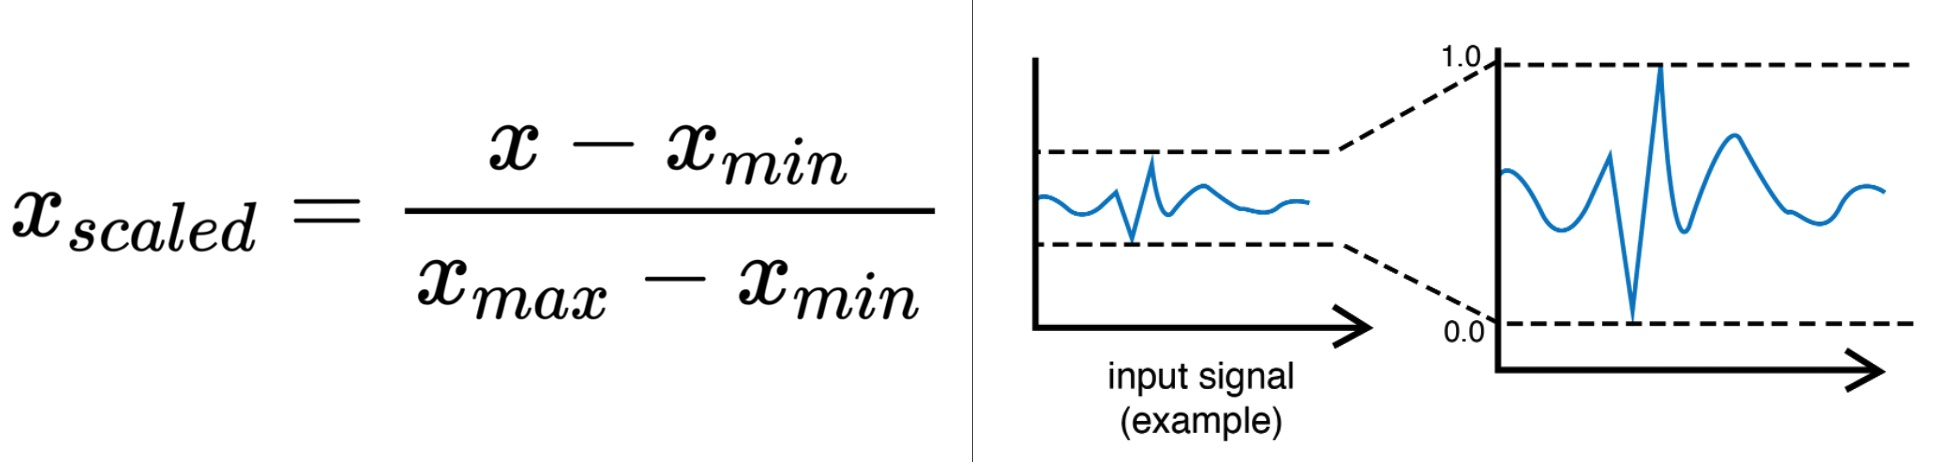

In [55]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)), # 2x4 행렬
                     index=pd.date_range("2023-12-01", periods=2, freq="W-WED"),
                     columns=['Colorado', 'Texas', "New York", 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2023-12-06,1.111006,-1.499969,-0.767650,-0.144493
2023-12-13,-0.878572,-1.147372,0.810787,1.202329


In [ ]:
df_daily = frame.resample("D").asfreq()
df_daily

In [ ]:
frame.resample('D').ffill() # foward fill

In [ ]:
frame.resample('D').ffill(limit=2) # foward fill 2개만 채워라.

In [ ]:
frame.resample('W-THU').ffill()

In [ ]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)), # 24x4 행렬
                     index=pd.period_range("1-2022", '12-2023', freq="M"),
                     columns=['Colorado', 'Texas', "New York", 'Ohio'])
frame.head()

In [ ]:
annual_frame = frame.resample('A-DEC').mean() # annual-december
annual_frame

In [68]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2022Q1,-0.052928,0.262634,0.517264,-0.511735
2022Q2,-0.052928,0.262634,0.517264,-0.511735
2022Q3,-0.052928,0.262634,0.517264,-0.511735
2022Q4,-0.052928,0.262634,0.517264,-0.511735
2023Q1,-0.103880,-0.194263,-0.075111,0.214806
2023Q2,-0.103880,-0.194263,-0.075111,0.214806
2023Q3,-0.103880,-0.194263,-0.075111,0.214806
2023Q4,-0.103880,-0.194263,-0.075111,0.214806


In [ ]:
annual_frame.resample('Q-DEC', convention='end').asfreq()

In [ ]:
annual_frame.resample('Q-MAR').ffill()

In [ ]:
# 시간 리샘플링 그룹화
N = 15
times = pd.date_range("2023-05-20 00:00", freq='1min', periods=N)
df = pd.DataFrame({'time' : times,
                   'value': np.arange(N)})
df

In [ ]:
df.set_index('time').resample('5min').count()

In [ ]:
df2 = pd.DataFrame({'time' : times.repeat(3),
                    'key' : np.tile(['a', 'b', 'c'], N),
                    'value' : np.arange(N * 3.)})
df2.head(9)

In [80]:
time_key = pd.Grouper(freq='5min')

In [ ]:
resampled = (df2.set_index('time').groupby(['key', time_key]).sum())
resampled

In [ ]:
resampled.reset_index()

In [83]:
# 윈도우 함수
url = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/'
file = 'stock_px.csv'

In [92]:
close_px_all = pd.read_csv(url+file, parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

In [ ]:
close_px['AAPL'].plot()

In [ ]:
close_px['AAPL'].rolling(250).mean().plot()

In [ ]:
plt.figure()
std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
std250.plot()

<Axes: >

<Figure size 800x400 with 0 Axes>

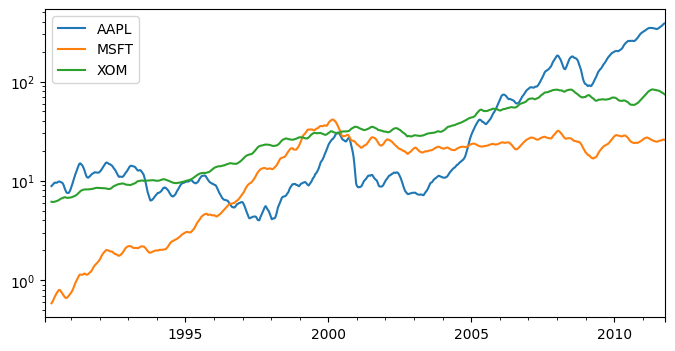

In [99]:
plt.figure()
close_px.rolling(60).mean().plot(logy=True)